<font color='DarkBlue' style='font-size: 30px;'>Predicting the House Prices</font>
<hr style='border: 1px solid DarkBlue;'>


### Dataset: https://www.kaggle.com/greenwing1985/housepricing

### Description:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>Our target in this project is to create a machine learning model, using the linear regression technique which predict house prices.</p>

### About Dataset:
<p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>This is database is generated by computer, to help the very bigger in the field of machine learning , who wish to practice python and different ML models.</p>


### Information:
<ul style='font-size: 18px; line-height: 2; text-align: justify;'>
    <li><b>Area</b> - Building area</li>
    <li><b>Garage</b> - The number of garage</li>
    <li><b>Fireplace</b> - The number of firesplaces</li>
    <li><b>Baths</b> - The number of baths</li>
    <li><b>White Marble</b> - White Marble (1) Yes / (0) No</li>
    <li><b>Black Marble</b> - Black Marble (1) Yes / (0) No</li>
    <li><b>Indian Marble</b> - Indian Marble (1) Yes / (0) No</li>
    <li><b>Floors</b> - There are more the one floor </li>
    <li><b>City</b> - City Location 1, 2 or 3. </li>
    <li><b>Solar</b> - Solar Heating (1) Yes / (0) No </li>
    <li><b>Electric</b> - Electric Heating (1) Yes / (0) No </li>
    <li><b>Fiber</b> - Fiber Internet Access (1) Yes / (0) No </li>
    <li><b>Glass Doors</b> - Glass Doors (1) Yes / (0) No </li>
    <li><b>Swimming Pool</b> - Swimming Pool (1) Yes / (0) No </li>
    <li><b>Garden</b> - Garden (1) Yes / (0) No </li>
    <li><b>Prices</b> - Building Price in US$</li>
</ul>

<font color='DarkBlue' style='font-size: 30px;'>Preliminary analysis</font>

In [1]:
#Importing the main libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy.stats import f_oneway, ttest_ind, shapiro
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
#Let's importing the warning library to ignore the warnings
import warnings

warnings.filterwarnings('ignore')

In [2]:
#Loading the dataset
data = pd.read_csv('dados/HousePrices_HalfMil.csv', sep = ',')

In [3]:
#Visualizing the dataset
data.head()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
0,164,2,0,2,0,1,0,0,3,1,1,1,1,0,0,43800
1,84,2,0,4,0,0,1,1,2,0,0,0,1,1,1,37550
2,190,2,4,4,1,0,0,0,2,0,0,1,0,0,0,49500
3,75,2,4,4,0,0,1,1,1,1,1,1,1,1,1,50075
4,148,1,4,2,1,0,0,1,2,1,0,0,1,1,1,52400


In [4]:
#Analysing the shape of the dataset
data.shape

(500000, 16)

In [5]:
#The type of the variables
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   Area           500000 non-null  int64
 1   Garage         500000 non-null  int64
 2   FirePlace      500000 non-null  int64
 3   Baths          500000 non-null  int64
 4   White Marble   500000 non-null  int64
 5   Black Marble   500000 non-null  int64
 6   Indian Marble  500000 non-null  int64
 7   Floors         500000 non-null  int64
 8   City           500000 non-null  int64
 9   Solar          500000 non-null  int64
 10  Electric       500000 non-null  int64
 11  Fiber          500000 non-null  int64
 12  Glass Doors    500000 non-null  int64
 13  Swiming Pool   500000 non-null  int64
 14  Garden         500000 non-null  int64
 15  Prices         500000 non-null  int64
dtypes: int64(16)
memory usage: 61.0 MB


In [6]:
#Checking the null values
data.isnull().sum()

Area             0
Garage           0
FirePlace        0
Baths            0
White Marble     0
Black Marble     0
Indian Marble    0
Floors           0
City             0
Solar            0
Electric         0
Fiber            0
Glass Doors      0
Swiming Pool     0
Garden           0
Prices           0
dtype: int64

In [7]:
# Statistic Descritive
data.describe()

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
count,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.000000,500000.00000,500000.000000,500000.00000,500000.000000,500000.000000,500000.000000
mean,124.929554,2.001290,2.003398,2.998074,0.332992,0.332690,0.334318,0.499386,2.000940,0.498694,0.50065,0.500468,0.49987,0.500436,0.501646,42050.139350
std,71.795363,0.817005,1.414021,1.414227,0.471284,0.471177,0.471752,0.500000,0.816209,0.499999,0.50000,0.500000,0.50000,0.500000,0.499998,12110.237201
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,7725.000000
25%,63.000000,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,33500.000000
50%,125.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1.00000,1.000000,0.00000,1.000000,1.000000,41850.000000
75%,187.000000,3.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,50750.000000
max,249.000000,3.000000,4.000000,5.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.00000,1.000000,1.00000,1.000000,1.000000,77975.000000


<font color='DarkBlue' style='font-size: 30px;'>Correlation Matrix</font>

The correlation coefficient is a measure of linear association between two variables where -1 indicating perfect negative association and +1 indicating perfect positive association.

In [8]:
data.corr().round(2)

,Area,Garage,FirePlace,Baths,White Marble,Black Marble,Indian Marble,Floors,City,Solar,Electric,Fiber,Glass Doors,Swiming Pool,Garden,Prices
Area,1.00,-0.0,0.00,-0.00,0.00,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,-0.00,0.0,0.0,0.15
Garage,-0.00,1.0,0.00,-0.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,-0.00,0.0,-0.0,0.10
FirePlace,0.00,0.0,1.00,0.00,0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,0.00,-0.00,0.0,0.0,0.09
Baths,-0.00,-0.0,0.00,1.00,0.00,-0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.0,0.0,0.15
White Marble,0.00,0.0,0.00,0.00,1.00,-0.50,-0.50,0.00,-0.00,-0.00,0.00,-0.00,-0.00,-0.0,0.0,0.45
Black Marble,-0.00,0.0,-0.00,-0.00,-0.50,1.00,-0.50,-0.00,-0.00,0.00,-0.00,0.00,0.00,0.0,0.0,-0.08
Indian Marble,-0.00,-0.0,-0.00,0.00,-0.50,-0.50,1.00,0.00,0.00,-0.00,-0.00,0.00,0.00,0.0,-0.0,-0.37
Floors,-0.00,-0.0,0.00,-0.00,0.00,-0.00,0.00,1.00,-0.00,-0.00,0.00,0.00,-0.00,-0.0,-0.0,0.62
City,-0.00,0.0,-0.00,-0.00,-0.00,-0.00,0.00,-0.00,1.00,0.00,0.00,-0.00,0.00,0.0,0.0,0.23
Solar,0.00,0.0,-0.00,-0.00,-0.00,0.00,-0.00,-0.00,0.00,1.00,0.00,0.00,-0.00,-0.0,-0.0,0.01


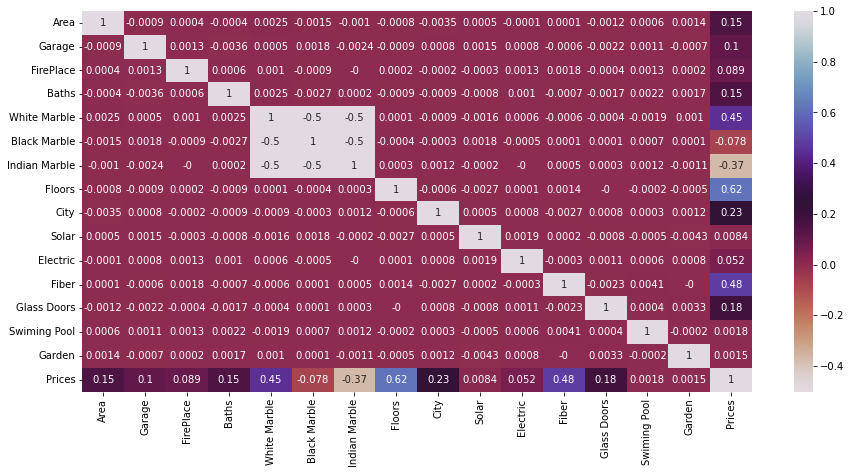

In [9]:
ax = sns.heatmap(data.corr().round(4), annot=True, cmap= 'twilight_r')
ax.figure.set_size_inches(15,7)

### Note the correlations between the variables:<br>

<li> The variables the have the most strong relationship with price is White Marble, Indian Marble, Floors, City and Fiber. It means that using this variables for the regression nearst to real price will be the prediction.</li>

<font color='DarkBlue' style='font-size: 30px;'>Dependent variable (y) analysis</font>

<img width='700px' src='https://github.com/eoliv107/LinearRegressionHousePricing/blob/main/dados/img/Box-Plot.png?raw=true'><br>
Font: https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51

In [10]:
#As we will use many time the boxplot, let's create a function to simplify our code
def creat_boxplot (dataset, y_var, x_var, title, xlabel, ylabel):  
    ax = sns.set_style('darkgrid')
    ax = sns.boxplot(data=dataset, y = y_var, x = x_var, width=0.4, palette='CMRmap' )
    ax.figure.set_size_inches(10,5)
    ax.set_title(title, loc = 'left', fontsize = 14)
    ax.set_xlabel(xlabel, fontsize = 12)
    ax.set_ylabel(ylabel, fontsize = 12)
    return ax

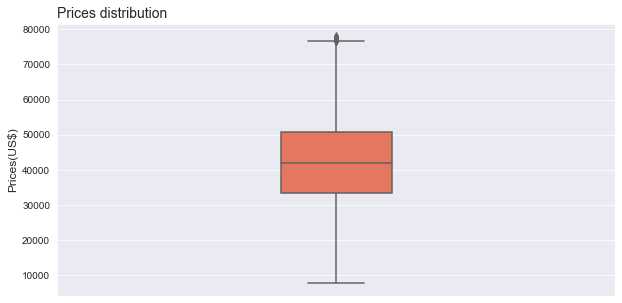

In [11]:
ax = sns.set_style('darkgrid')
ax = sns.boxplot(data=data, y = 'Prices', width=0.2, palette='Reds')
ax.figure.set_size_inches(10,5)
ax.set_title('Prices distribution', loc = 'left', fontsize = 14)
ax.set_ylabel('Prices(US$)', fontsize = 12)
ax = ax

<li>The behavior of the boxplot is normal we see the median is in the center of the box, which means that the graph is symmetric. We can see few outliers.</li>

<font color='DarkBlue' style='font-size: 30px;'>Bivariate analysis</font><br><br>
<font color='DarkBlue' style='font-size: 20px;'>Box-plot (Prices vs Garage)</font>

Hypotesis Test:<br>
<b>H0:</b> The number of garage does no affect on the house prices

<AxesSubplot:title={'left':'Price distribution by the number of garages'}, xlabel='Number of Garages', ylabel='Prices(US$)'>

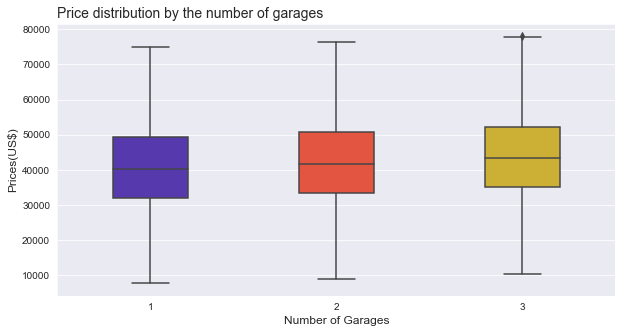

In [12]:
creat_boxplot(data, 'Prices', 'Garage', 'Price distribution by the number of garages',
              'Number of Garages', 'Prices(US$)' )

<li>Graphically we see the more number of garage the house have the higher price the house will be.</li>

In [13]:
#We will use the F-Oneway ANOVA since we have more two variables to test
df_aux = data[['Prices', 'Garage']]
stats, p_value = f_oneway( df_aux[df_aux['Garage'] == 1]['Prices'],
                           df_aux[df_aux['Garage'] == 2]['Prices'],
                           df_aux[df_aux['Garage'] == 3]['Prices']
                          )                          
print(f'Stats: {stats.round(2)} and P-Value:{p_value.round(2)}')

Stats: 2540.37 and P-Value:0.0


In [14]:
tukey = pairwise_tukeyhsd(df_aux['Prices'], df_aux['Garage'], alpha = 0.05)

print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
     1      2 1469.7482  -0.0  1371.845 1567.6514   True
     1      3 2973.2353  -0.0 2875.4708 3070.9998   True
     2      3 1503.4871  -0.0 1405.6783 1601.2959   True
--------------------------------------------------------


Based on F test P-value is equal zero minor than 0.05, then we have evidence to reject the null hypothesis which means that numbers of garage affect in houses the price or the mean for each group is different.

<font color='DarkBlue' style='font-size: 20px;'>Box-plot (Prices vs Baths) </font><br><br>
Hypotesis Test:<br>
<b>H0:</b> The number of bath does no affect on the house prices

<AxesSubplot:title={'left':'Price distribution by the number of Baths'}, xlabel='Number of Baths', ylabel='Prices(US$)'>

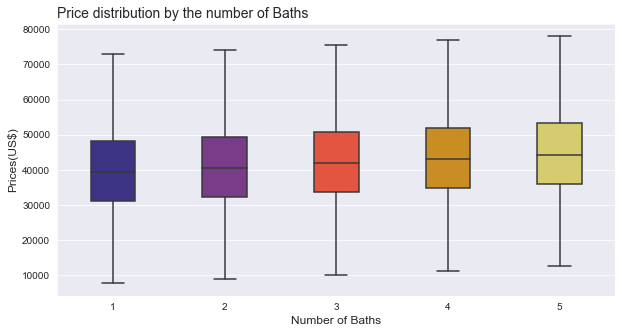

In [15]:
creat_boxplot(data, 'Prices', 'Baths', 'Price distribution by the number of Baths',
              'Number of Baths', 'Prices(US$)' )

<li>For the number of bath is the same, the more number of baths the house have the higher price will be.</li>

In [16]:
#We will use the F-Oneway ANOVA since we have more two variables to test
df_aux = data[['Prices', 'Baths']]
stats, p_value = f_oneway( df_aux[df_aux['Baths'] == 1]['Prices'],
                           df_aux[df_aux['Baths'] == 2]['Prices'],
                           df_aux[df_aux['Baths'] == 3]['Prices'],
                           df_aux[df_aux['Baths'] == 4]['Prices'],
                           df_aux[df_aux['Baths'] == 5]['Prices'],
                          )                          
print(f'Stats: {stats.round(2)} and P-Value:{p_value.round(2)}')

Stats: 2687.97 and P-Value:0.0


In [17]:
tukey = pairwise_tukeyhsd(df_aux['Prices'], df_aux['Baths'], alpha = 0.05)

print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
     1      2 1230.3052   0.0 1084.1761 1376.4343   True
     1      3 2508.7464   0.0 2362.7505 2654.7423   True
     1      4 3731.3027   0.0 3585.2451 3877.3604   True
     1      5 4961.4896   0.0 4815.3407 5107.6385   True
     2      3 1278.4412   0.0 1132.2536 1424.6289   True
     2      4 2500.9975   0.0 2354.7482 2647.2468   True
     2      5 3731.1844   0.0  3584.844 3877.5249   True
     3      4 1222.5563   0.0 1076.4401 1368.6725   True
     3      5 2452.7432   0.0 2306.5357 2598.9506   True
     4      5 1230.1869   0.0 1083.9178  1376.456   True
--------------------------------------------------------


Based on F test P-value is equal zero minor than 0.05, then we have evidence to reject the null hypothesis which means that numbers of Baths affect in houses the price or the mean for each group is different.

<font color='DarkBlue' style='font-size: 20px;'> Box-plot (Price vs Fireplace)</font><br><br>
Hypotesis Test:<br>
<b>H0:</b> The number of fireplace does no affect on the house prices

<AxesSubplot:title={'left':'Price distribution by the number of fireplaces'}, xlabel='Number of fireplaces', ylabel='Prices(US$)'>

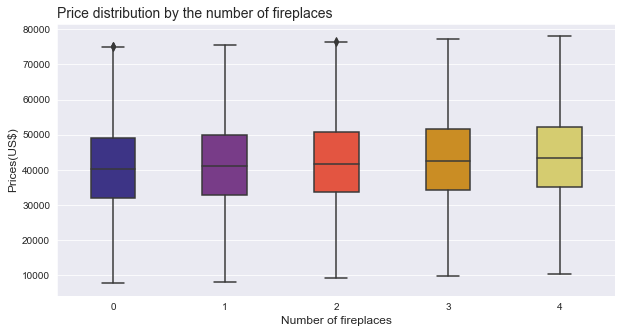

In [18]:
creat_boxplot(data, 'Prices', 'FirePlace',
              'Price distribution by the number of fireplaces', 'Number of fireplaces', 'Prices(US$)' )

<li>For the number of fireplaces is the same, the more number of fireplaces the house have the higher price will be.</li>

In [19]:
#We will use the F-Oneway ANOVA since we have more two variables to test
df_aux = data[['Prices', 'FirePlace']]
stats, p_value = f_oneway( df_aux[df_aux['FirePlace'] == 1]['Prices'],
                           df_aux[df_aux['FirePlace'] == 2]['Prices'],
                           df_aux[df_aux['FirePlace'] == 3]['Prices'],
                           df_aux[df_aux['FirePlace'] == 4]['Prices'],
                          )                          
print(f'Stats: {stats.round(2)} and P-Value:{p_value.round(2)}')

Stats: 654.81 and P-Value:0.0


In [20]:
tukey = pairwise_tukeyhsd(df_aux['Prices'], df_aux['FirePlace'], alpha = 0.05)

print(tukey)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj   lower     upper   reject
--------------------------------------------------------
     0      1  798.3544   0.0   651.044  945.6647   True
     0      2  1551.717   0.0  1404.396  1699.038   True
     0      3 2296.9463   0.0 2149.7039 2444.1888   True
     0      4 3067.8864   0.0 2920.7018 3215.0711   True
     1      2  753.3626   0.0  606.1945  900.5308   True
     1      3  1498.592   0.0 1351.5025 1645.6815   True
     1      4 2269.5321   0.0 2122.5005 2416.5637   True
     2      3  745.2293   0.0  598.1292  892.3295   True
     2      4 1516.1695   0.0 1369.1272 1663.2117   True
     3      4  770.9401   0.0  623.9765  917.9037   True
--------------------------------------------------------


Based on F test P-value is equal zero minor than 0.05, then we have evidence to reject the null hypothesis which means that numbers of Fireplaces affect in houses the price or the mean for each group is different.

<font color='DarkBlue' style='font-size: 20px;'>Box-plot (Price vs White Marble)</font><br><br>
Hypotesis Test:<br>
<b>H0:</b> Having White Marble does no affect on the house prices

<AxesSubplot:title={'left':'Price distribution by the White Marble'}, xlabel='Marble', ylabel='Prices(US$)'>

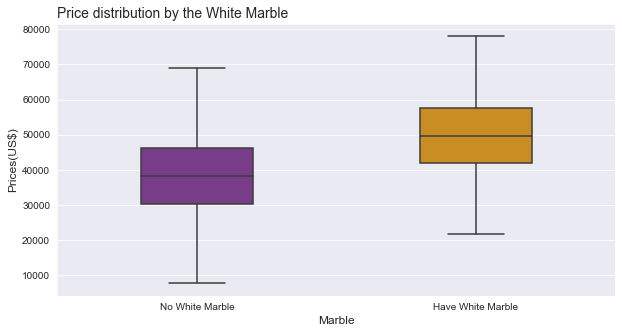

In [21]:
creat_boxplot(data, 'Prices', data['White Marble'].map({0:'No White Marble',1:'Have White Marble'}),
              'Price distribution by the White Marble', 'Marble', 'Prices(US$)' )

<li>Having white marble the price of houses tend to increase, as we see in the graph.</li>

In [22]:
#Let's change the Test, instead F test we will use T Test, it's possible because we just have
#two variable and the curve is normal
df_aux = data[['Prices', 'White Marble']]
stats, p_value = ttest_ind(df_aux[df_aux['White Marble'] == 0]['Prices'],
                           df_aux[df_aux['White Marble'] == 1]['Prices'])
print(f'Stats: {stats.round(2)} and P-Value:{p_value}')

Stats: -354.48 and P-Value:0.0


Based on T test P-value is equal zero minor than 0.05, then we have evidence to reject the null hypothesis which means the houses with White Marble have difference on their prices or the mean for each group is different.

<font color='DarkBlue' style='font-size: 20px;'>Box-plot (Price vs Floors)</font><br><br>
Hypotesis Test:<br>
<b>H0:</b> Having more floors in the house does not affect the price

<AxesSubplot:title={'left':'Price distribution by floors'}, xlabel='Floors', ylabel='Prices(US$)'>

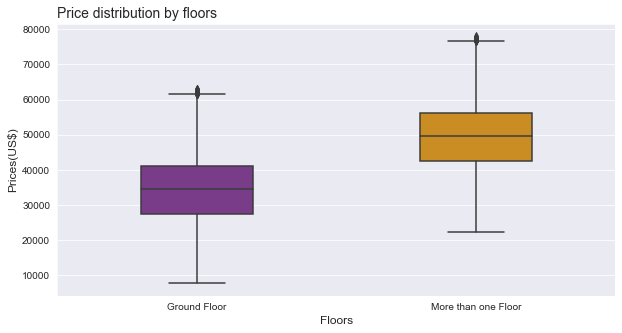

In [23]:
creat_boxplot(data, 'Prices', data['Floors'].map({0:'Ground Floor',1:'More than one Floor'}),
              'Price distribution by floors', 'Floors', 'Prices(US$)' )

<li>Ground floor houses tend to have lower prices than houses with more than one floor.</li>

In [24]:
#Let's change the Test, instead F test we will use T Test, it's possible because we just have
#two variable and the curve is normal
df_aux = data[['Prices', 'Floors']]
stats, p_value = ttest_ind(df_aux[df_aux['Floors'] == 0]['Prices'],
                           df_aux[df_aux['Floors'] == 1]['Prices'])
print(f'Stats: {stats.round(2)} and P-Value:{p_value}')

Stats: -557.96 and P-Value:0.0


Based on T test P-value is equal zero minor than 0.05, then we have evidence to reject the null hypothesis which means the houses with more floors have difference on their prices or the mean for each group is different.

<font color='DarkBlue' style='font-size: 20px;'>Box-plot (Price vs Internet Access)</font><br><br>
Hypotesis Test:<br>
<b>H0:</b> Having more fiber access does not affect the price

<AxesSubplot:title={'left':'Price distribution by type of Internet Access'}, xlabel='Type of Internet Access', ylabel='Prices(US$)'>

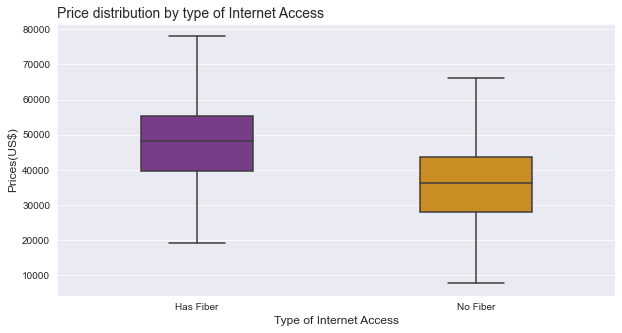

In [25]:
creat_boxplot(data, 'Prices', data['Fiber'].map({0:'No Fiber',1:'Has Fiber'}),
              'Price distribution by type of Internet Access', 'Type of Internet Access', 'Prices(US$)' )

<li>According to the graph Fiber internet access increse the houses prices.</li>

In [26]:
#Let's change the Test, instead F test we will use T Test, it's possible because we just have
#two variable and the curve is normal
df_aux = data[['Prices', 'Fiber']]
stats, p_value = ttest_ind(df_aux[df_aux['Fiber'] == 0]['Prices'],
                           df_aux[df_aux['Fiber'] == 1]['Prices'])
print(f'Stats: {stats.round(2)} and P-Value:{p_value}')

Stats: -391.76 and P-Value:0.0


Based on T test P-value is equal zero minor than 0.05, then we have evidence to reject the null hypothesis which means the houses with fiber access have difference on their prices or the mean for each group is different.

<font color='DarkBlue' style='font-size: 20px;'>Histogram for prices</font>

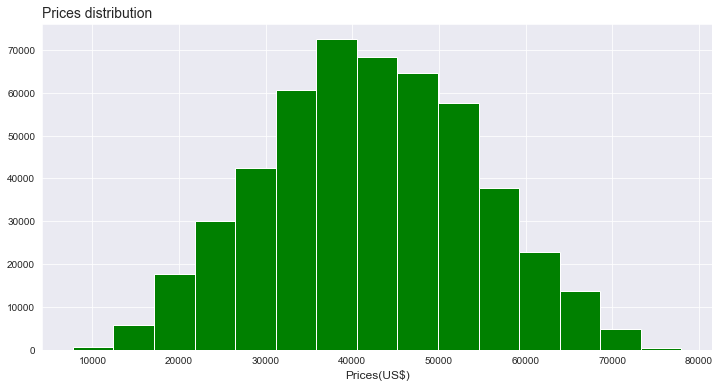

In [27]:
plt.figure(figsize=(12,6))
ax = plt.hist(data.Prices, bins = 15, color = 'green')
plt.xlabel('Prices(US$)', fontsize = 12)
plt.title('Prices distribution', fontsize = 14, loc = 'left')
ax = ax

It seems that is a normal curve, but we can test for the normality using the Shapiro-Wilks Test.<br><br>
The shapiro-wilks test is an indicator of how well our data fit the normal distribution. The first parameter of the W statistic (when it is close to 1 the distribution is Gaussian), and the second parameter is the p_value (when p_value is greater than 0.05, the distribution is Gaussian).

In [28]:
from scipy import stats
stats.shapiro(data.Prices)

ShapiroResult(statistic=0.9957601428031921, pvalue=0.0)

Doing the Shapiro test, we can conclude that the curve is a normal curve.

Text(0.5, 1.05, 'Dispersion between variables')

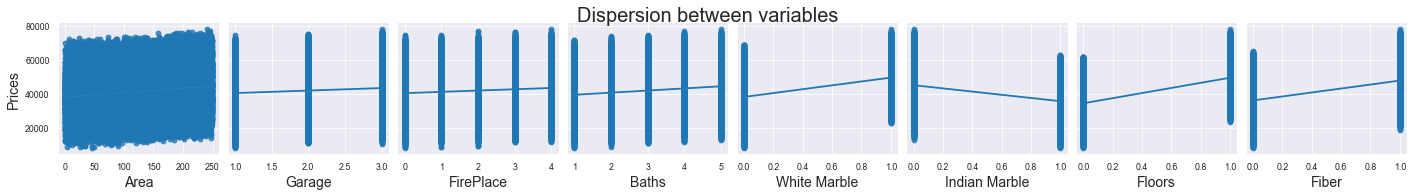

In [29]:
xvars = ['Area', 'Garage', 'FirePlace', 'Baths', 'White Marble',
       'Indian Marble', 'Floors','Fiber']
sns.set_context("paper", rc={"axes.labelsize":14})
ax = sns.pairplot(data=data.sample(frac=0.1), x_vars=xvars, y_vars='Prices', kind='reg')
ax.fig.suptitle('Dispersion between variables', fontsize=20, y=1.05)

We see in the graphs above except by Indian Marble which influence negatively, all other variables have a positive impact on the price, it means that the influence by the variable increase the houses price. On the other hand Indian Marble variable decrease the house prices.

# <font color='DarkBlue' style='font-size: 20px;'>Predicting the Prices using linear regression</font>

In [30]:
#Dependent variable y (Prices)
y = data[['Prices']]
y.head(1)

,Prices
0,43800


In [31]:
#Independent Variables X(['White Marble', 'Floors', 'Fiber'])
X = data[['White Marble', 'Floors', 'Fiber', 'Garage', 'Baths', 'FirePlace']]
X.head(1)

,White Marble,Floors,Fiber,Garage,Baths,FirePlace
0,0,0,1,2,2,0


In [32]:
#Creating Train and Test Datasets using Train_test_split from skitlearn
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [33]:
#Instantiating the class
model=LinearRegression(normalize=True)

In [34]:
#Estimating some parameters in the model using fit() method.
model.fit(X_train, y_train)

LinearRegression(normalize=True)

<font color='DarkBlue' style='font-size: 20px;'>What Is R-Squared?</font><br><br>
<b>R-squared (R²)</b> is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model. Whereas correlation explains the strength of the relationship between an independent and dependent variable, R-squared explains to what extent the variance of one variable explains the variance of the second variable. So, if the R² of a model is 0.50, then approximately half of the observed variation can be explained by the model's inputs.<br><br>
Font: https://www.investopedia.com/terms/r/r-squared.asp

In [35]:
print('R² = {}'.format(model.score(X_train, y_train).round(2)))

R² = 0.86


In [36]:
#Predicting with X-test
y_predicted = model.predict(X_test)

In [37]:
#R² from the predicted
print('R² = %s' % metrics.r2_score(y_test, y_predicted).round(2))

R² = 0.86


After validating our model against the testing set, we get an R² of 0.82 which seems like a pretty good performance score.

<font color='DarkBlue' style='font-size: 30px;'>Interpreting the coefficients:</font>

<img width='600px' src='https://github.com/eoliv107/LinearRegressionHousePricing/blob/main/dados/img/coeficient.png?raw=true'><br>
Font: https://www.kdnuggets.com/2020/10/guide-linear-regression-models.html

In [38]:
#Display the intercept as well as the coefficients of each variable estimated by the model
coef = np.append(model.intercept_, model.coef_).round(2)
col = ['Intercept', 'White Marble', 'Floors', 'Fiber', 'Garage', 'Baths', 'FirePlace']
coeficients = pd.DataFrame(coef, index = col, columns=['Parameters'])
coeficients

,Parameters
Intercept,16618.81
White Marble,11509.53
Floors,15002.08
Fiber,11728.52
Garage,1505.38
Baths,1246.21
FirePlace,744.38


<b><font color='black' style='font-size: 15px;'>Y = 16618.81 + 11509.53 (White Marble) + 15002.08 (Floors) + 11728.52 (Fiber) + 1505.38(Garage) + 1246.21(Bath) + 744.38(Fireplace)</font></b><br><br>
Which means if all variables are zero, the house price will be the intercept ($16,618.81)

In [39]:
X2 = sm.add_constant(X_train)
model_stats = sm.OLS(y_train.values, X2).fit()
model_stats.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.858
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                 3.372e+05
Date:                Sat, 16 Apr 2022   Prob (F-statistic):               0.00
Time:                        10:44:39   Log-Likelihood:            -3.2981e+06
No. Observations:              335000   AIC:                         6.596e+06
Df Residuals:                  334993   BIC:                         6.596e+06
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1.662e+04     31.576    526.310      0.000    1.66e+04    1.67e+04
White Marble  1.151e+04     16.739    687.590      0.000    1.15e+04    1.15e+04
Floors          1.5e+04     15.772    951.200      0.000     1.5e+04     1.5e+04
Fiber         1.173e+04     15.772    743.640      0.000    1.17e+04    1.18e+04
Garage        1505.3804      9.657    155.886      0.000    1486.453    1524.308
Baths         1246.2073      5.579    223.391      0.000    1235.273    1257.141
FirePlace      744.3785      5.580    133.402      0.000     733.442     755.315
==============================================================================
Omnibus:                     4136.052   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2510.344
Skew:                          -0.002   Prob(JB):                         0.00
Kurtosis:                       2.576   Cond. No.                         18.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The p-value for all variables are less than 0.05 so, there is a strong relationship between the variables and the target.
It seems to be appropriate to reach a robust model using all variables.